# Assignment 1: Solution

### We first import the necessary packages

In [2]:

import pandas            as pd
import numpy             as np
import scipy             as scp
import matplotlib.pyplot as plt
import os as os
from datetime import date as dd
from scipy import stats
from scipy import optimize
import statsmodels.api as sm
# %matplotlib inline

### We now get the data


In [4]:
os.getcwd()
df=pd.read_excel('Assignment 1_MF402_2024.xlsx', sheet_name='Data')
os.getcwd()

'c:\\Users\\tom89\\Documents\\GitHub\\US_stock\\hw1'

## Part One

In [5]:
df.head()

,Date,vwret,mkt_index,dp,10y,10y_index,3m,3m_index,cpi,cpi_index,...,manuf,energy,chems,buseq,telcm,utils,shops,health,money,other
0,01/31/1970,-0.075398,100.000000,0.037207,0.028827,100.000000,0.007158,100.000000,0.002653,100.000000,...,-7.82,-11.45,-5.44,-9.17,-2.57,-4.23,-5.88,-7.12,-9.18,-8.53
1,02/28/1970,0.059521,105.269348,0.035382,0.067886,106.788595,0.007986,100.798584,0.005291,100.562430,...,5.68,5.38,3.36,2.94,7.96,8.36,5.23,5.60,11.44,7.86
2,03/31/1970,0.002806,105.422254,0.035368,-0.000269,106.759882,0.007078,101.512027,0.005263,101.124859,...,-0.27,-0.45,-0.38,-2.59,2.29,2.91,-1.69,-5.08,-0.77,-2.91
3,04/30/1970,-0.088831,95.883322,0.038927,-0.050871,101.328913,0.005494,102.069753,0.007853,101.912261,...,-9.78,-9.17,-6.24,-14.45,-8.79,-8.05,-11.08,-10.11,-12.78,-14.51
4,05/31/1970,-0.054689,90.037638,0.041498,-0.006522,100.668015,0.006237,102.706368,0.002597,102.137233,...,-9.01,2.61,-2.97,-9.50,-3.75,-5.36,-9.45,-7.78,-8.37,-8.14


In [6]:
date = df.iloc[:,0]
returns = df.iloc[:,1]         # Nominal returns
inflation = df.iloc[:,8]       # Inflation
real_ret = returns - inflation # Real returns

# Fill in rfrate and rf10 from the dataframe
rfrate = df.iloc[:,6]
rf10 = df.iloc[:,4]      # Risk free rate


### Question 1.1

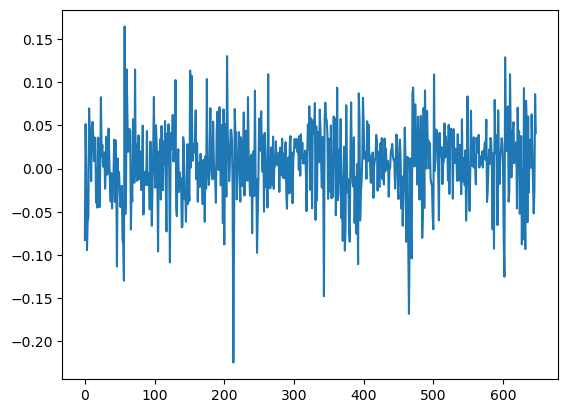

In [7]:
erp = returns - rfrate         # Excess Return
plt.plot(erp)

We now need to run a regression of excess return on a constant. There are multiple ways of doing this. We can define a user created function or use statsmodels package. Here we will use statsmodels package.

In [8]:
dim = erp.shape[0]
cons = np.ones(dim)                            # Create a vector of ones.
model = sm.OLS(12*erp,cons).fit()
yhat = model.predict()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 07 Oct 2024   Prob (F-statistic):                nan
Time:                        22:16:38   Log-Likelihood:                -514.31
No. Observations:                 648   AIC:                             1031.
Df Residuals:                     647   BIC:                             1035.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0673      0.021      3.200      0.001       0.026       0.109
==============================================================================
Omnibus:                       46.062   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.502
Skew:                          -0.443   Prob(JB):                     1.35e-20
Kurtosis:                       4.613   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
print(yhat.mean())

0.06733155555555558


We need to look at the standard errors of the constant. Do they look small or large to you?

### Question 1.2

We are now interested in the moving average of the equity risk premium.

In [10]:
ma_erp=erp.rolling(window=120).mean()

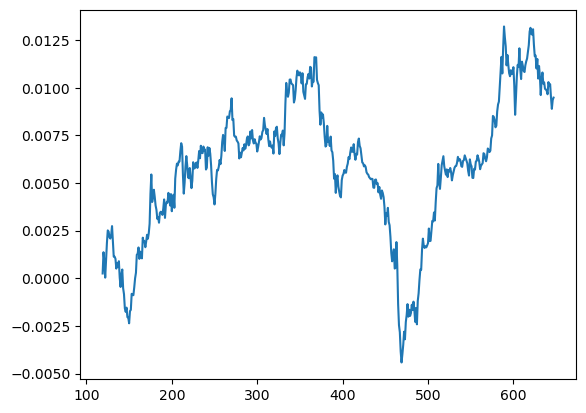

In [11]:
plt.plot(ma_erp)

From the graph above it is clear that the historical estimate of the equity risk premium is stable/not stable.

### Question 1.3

We get the long run US GDP growth from the Survey of Professional Forecasters:

https://www.philadelphiafed.org/surveys-and-data/real-time-data-research/spf-q3-2021

2025 GDP Growth rate is xxx

In [12]:
us_gdp_growth = 2.0/100        # Fill from above

From FRED we get the 10 Year TIPS https://fred.stlouisfed.org/series/DFII10#0


For 2021 year end we have: xxx


In [13]:
tips_yield = 1.72/100 # Fill from above

In [14]:
last_dpratio = df.iloc[dim-1,3]

According to the Grodon Growth model the equity risk premium is given by:

In [15]:
gordon = last_dpratio*(1+us_gdp_growth) + us_gdp_growth - tips_yield
print("According to the Gordon Growth Model the ERP is %.2f percent" % (gordon*100))

According to the Gordon Growth Model the ERP is 1.78 percent


### Question 1.4

The novel approach in Slide 9 of the case study gives the following formula: $$ ERP = E/P - RealBondYield $$


In [16]:
ep = 3.4/100
# print(real_ret.head())
# print(real_ret.tail())
curr_rby=real_ret.iloc[-1]
erp_nov= ep - curr_rby                                         # Fill in the relevant variables
print(f'according to the novel method, ERP is equal to {erp_nov*100}%')

according to the novel method, ERP is equal to -1.2290999999999996%


###### According to the Golden Growth Model, Stock Price = Dividend /( Expexted Earnings growth rate - Dividend growth rate )
###### Dividend = Dividend Payout Ratio * Expexted Earnings
###### P/E Ratio = Dividend Payout Ratio/( Expexted Earnings growth rate - Dividend growth rate )
###### Dividend Payout Ratio of two companies is from:
###### https://finance.yahoo.com/quote/AAPL/key-statistics/
###### https://finance.yahoo.com/quote/WMT/key-statistics/
###### Expexted Earnings growth rate of two companies is from:
###### https://finance.yahoo.com/quote/AAPL/analysis/
###### https://finance.yahoo.com/quote/WMT/analysis/
###### Dividend growth rate of two companies is from:
###### https://finance.yahoo.com/quote/AAPL/financials/
###### https://finance.yahoo.com/quote/WMT/financials/

In [17]:
dpr_app = 14.76/100
dpr_wal = 41.41/100

er_app = 11.10/100
er_wal = 10.17/100

g_app = 96995000*0.14/99803000*0.1476-1
g_wal = 15511000*0.41/11680000*0.53-1

pe_app = dpr_app/(er_app - g_app)
pe_wal = dpr_wal/(er_wal - g_wal)

print(pe_app)
print(pe_wal)

0.1352989706561283
0.5092689505941136


Because of the higher Dividend Payout Ratio, higher Dividend growth rate and lower Expexted Earnings growth rate, Walmat's P/E Ratio is higher than Apple.


## Part Two

### Question 2.1

a. We need to calculate the annualized sharpe ratio. We first get the mean return over the full sample and multiply by 12 to annualize, then we get the standard deviation over the full sample and multiply by the square root of 12.

In [18]:
erp = returns- rf10
vol_ret = np.std(returns)
annualized_vol = vol_ret * np.sqrt(12)               # Compute the annnualized volatility of returns

mean_erp = np.mean(erp)
annualized_erp = 12*mean_erp

shratio = annualized_erp / annualized_vol                    # Compute the Sharpe ratio
print("The annualized sharpe ratio is %.2f" % shratio)

The annualized sharpe ratio is 0.30


b. We now need to calculate the 3% VaR

In [19]:
alpha_var = 0.03
returns_sorted = np.sort(returns)

VaR = np.quantile(returns_sorted, alpha_var) # quantile interpolates (linear default)
print("The VaR is %.2f percent" % (VaR*100))

The VaR is -8.24 percent


c. Calculating Expected Shortfall

In [20]:
alpha_es = 0.03
ES = np.mean(returns[returns<-VaR])           # Compute the expected shortfall
print("The Expected Shortfall is %.2f percent" % (ES*100))

The Expected Shortfall is 0.57 percent


d. Calculating Skew

In [21]:
sk = scp.stats.skew(returns)
print("The skewness is %.2f" % sk)

The skewness is -0.42


e. Calculating Kurtosis

In [22]:
kurt = scp.stats.kurtosis(returns)
print("The kurtosis is %.2f" % kurt)

The kurtosis is 1.58


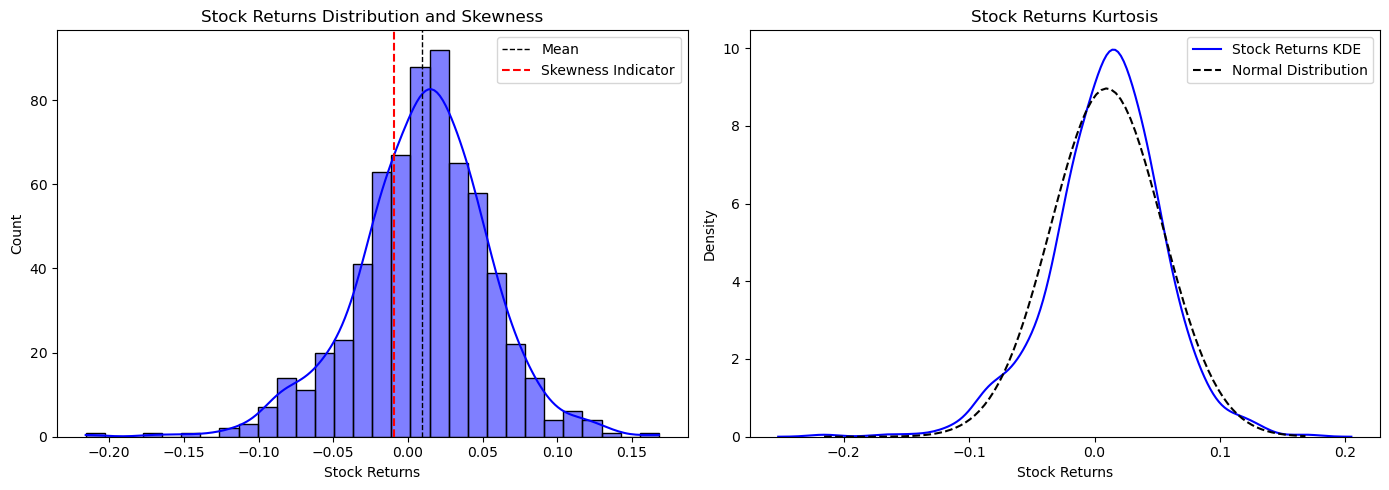

In [23]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Skewness plot
sns.histplot(returns, bins=30, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Stock Returns Distribution and Skewness")
axes[0].set_xlabel("Stock Returns")
axes[0].axvline(returns.mean(), color='black', linestyle='--', linewidth=1, label='Mean')
axes[0].axvline(returns.mean() + returns.skew()*returns.std(), color='red', linestyle='--', label='Skewness Indicator')
axes[0].legend()

# Kurtosis plot
sns.kdeplot(returns, color="blue", ax=axes[1])
x = np.linspace(returns.min(),returns.max(), 100)
y = stats.norm.pdf(x,returns.mean(),returns.std())  # normal distribution for comparison
axes[1].plot(x, y, 'k--', label='Normal Distribution')
axes[1].set_title("Stock Returns Kurtosis")
axes[1].set_xlabel("Stock Returns")
axes[1].legend(["Stock Returns KDE", "Normal Distribution"])

plt.tight_layout()
plt.show()

f. We now need to calculate Maximum Drawdown. We use the python code used in class to have a user written function.

In [24]:
def maxdrawdown(x):
    """
    NumPy analog to corresponding MATLAB Financial Toolbox Function
    OUTPUT: start, end, and max drawdown in terms of max percentage drop from a peak
    """
    i = np.argmax(np.maximum.accumulate(x) - x) # end of period
    j = np.argmax(x[:i]) # start of the period
    percent_change = 100*( x[i] - x[j] ) / x[j]
    return j,i,percent_change

def datenum(date):
    """
    Converts yyyymmdd dates to ordinal code
    """
    dn = np.zeros(date.shape)
    for i in range(len(date)):
        dt = str(date[i])
        dn[i] = dd.toordinal(dd(int(dt[0:4]),int(dt[4:6]),int(dt[6:8])))
    return dn

In [25]:
cumulativeret = np.cumprod(1+returns)

MaxDDStartIndex, MaxDDEndIndex, MaxDD = maxdrawdown(cumulativeret)
begdate = date[MaxDDStartIndex]
enddate = date[MaxDDEndIndex]

In [26]:
print(f'The Maximum Drawdown is {MaxDD:.2}%')

The Maximum Drawdown is -2.4e+01%


In [27]:
print(f'Max VC DrawDown from date {begdate} to date {enddate}')

Max VC DrawDown from date 12/31/2021 to date 09/30/2022


g. Checking normality

(array([  1.,   2.,   5.,  32.,  84., 218., 215.,  75.,  14.,   2.]),
 array([-0.215795 , -0.1774042, -0.1390134, -0.1006226, -0.0622318,
        -0.023841 ,  0.0145498,  0.0529406,  0.0913314,  0.1297222,
         0.168113 ]),
 <BarContainer object of 10 artists>)

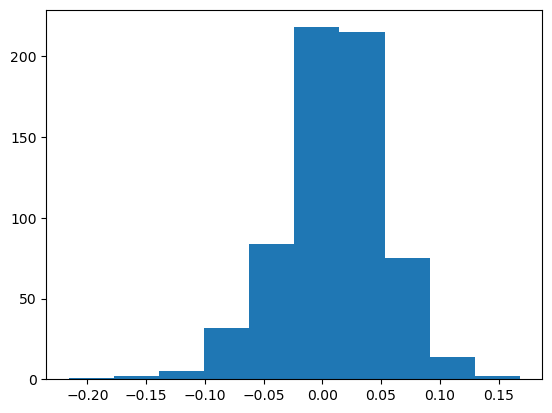

In [28]:
plt.hist(returns)

Looking at the histogram, skewness and kurtosis, we conclude xxx.

### Question 2.2

We first setup the Sharpe ratio function for the optimization problem.

In [29]:
def Shratio(w,mu,Sigma,Rf):
    portfolio_return = np.sum(mu * w) - Rf    # portfolio excess return
    portfolio_vol    = np.sqrt(np.dot(w.T, np.dot(Sigma,w)))  # portfolio volatility
    return portfolio_return / portfolio_vol

We now need to set the risk free rate and select the number of assets in our portfolio.

In [30]:
Rf = rfrate[len(rfrate)-1]  # risk free rate
n = 2                      # number of assets
tbonds_ret = df.iloc[:,4]   # tbonds
tbills_ret =df.iloc[:,6]    # tbills

Combine stock, and bond returns in to a matrix, calculate the mean return of all assets, and the covariance.

In [31]:
ret = np.concatenate((np.expand_dims(returns,1), np.expand_dims(tbonds_ret,1)),axis = 1)
mu = np.mean(ret, axis = 0)
Sigma = np.cov(ret, rowvar = False)

Set the initial weights to be equal

In [32]:
w0 = np.ones(n)/n

Set the constraint condition and solve for the tangency portfolio.

In [33]:
cons = ({'type' : 'eq', 'fun': lambda x: x[0] + x[1] - 1}) # portfolio weights sum to 1

# solve for tangency portfolio
sol = scp.optimize.minimize(lambda w: -Shratio(w, mu, Sigma, Rf), x0 = w0, constraints = cons)
w_uncon = sol.x
val = -sol.fun

print(f'optimal weights are {w_uncon} with Sharpe ratio {val:.2}')

optimal weights are [0.52950568 0.47049432] with Sharpe ratio 0.13


Calculate the mean and variance of the tangency portfolio, and the weight on the portfolio.

In [34]:
#### add risk-free asset
gam = 5                                         # gamma: risk aversion coefficient
mu_uncon  = w_uncon.T.dot(mu)                   # mean of tangency portfolio
var_uncon = np.dot(w_uncon.T, np.dot(Sigma, w_uncon))                                   # variance of tangency portfolio
wT_con    = (mu_uncon - Rf) / (gam * var_uncon)                                     # weight to be put in the tangency when maximizing mean variance utility
rcon      = wT_con*mu_uncon + (1-wT_con)*Rf

# cov_matrix = np.cov(returns.T)
# cov_bonds = np.cov(returns.values.flatten(), tbonds_ret.values.flatten())

cov_matrix = np.cov(returns.values)  # Get covariance of stock returns
cov_bonds = np.cov(returns.values, tbonds_ret.values)  # Calculate covariance between stocks and bonds

In [35]:
print(f'The mean of the tangency portfolio is :{mu_uncon:.2}')
print(f'The variance of the tangency portfolio is : {var_uncon:.2}')
print(f'The weight on the risky portfolio is : {wT_con:.2}')
print(f'The return of the tangency portfolio is : {rcon:.2}')
cov_value = cov_bonds[0, 1]  # Covariance value
print(f'Covariance between stocks and bonds: {cov_value:.4f}')


The mean of the tangency portfolio is :0.0078
The variance of the tangency portfolio is : 0.00074
The weight on the risky portfolio is : 0.96
The return of the tangency portfolio is : 0.0076
Covariance between stocks and bonds: 0.0001


### Question 2.3

In [36]:
delta = tbonds_ret - returns
under = sum(delta > 0) / dim

In [37]:
print(f'a. Stocks underperform bonds approx.{under * 100:.2f}% of the time.')

a. Stocks underperform bonds approx.43.52% of the time.


In [38]:
def CumReturnsAndDeltas(df, num_months, dim):

    ret =[]
    delta = []

    for i in range(num_months, dim):
        ret.append(np.array([(df.iloc[i,2] / df.iloc[i-num_months,2]) - 1,          # Stocks
                                 ( df.iloc[i,5] / df.iloc[i-num_months,5] ) - 1,    # Bonds
                                 ( df.iloc[i,7] / df.iloc[i-num_months,7] ) - 1,    # T-bill
                                 ( df.iloc[i,11] / df.iloc[i-num_months,11] ) - 1,  # BTC
                                 ( df.iloc[i,14] / df.iloc[i-num_months,14] ) - 1,  # Gold
                                 ( df.iloc[i,9] / df.iloc[i-num_months,9] ) - 1 ])) # Inflation
        delta.append(ret[i-num_months][1]- ret[i-num_months][0])

    ret = np.array(ret)
    delta = np.array(delta)
    return ret, delta



In [39]:
ret_cumulative_1yr, delta_1yr = CumReturnsAndDeltas(df, 12, dim)
delt_1yr = sum(delta_1yr > 0) / delta_1yr.shape[0]

ret_cumulative_5yr, delta_5yr = CumReturnsAndDeltas(df, 60, dim)
delt_5yr = sum(delta_5yr > 0) / delta_5yr.shape[0]
ret_cumulative_10yr, delta_10yr = CumReturnsAndDeltas(df, 120, dim)
delt_10yr = sum(delta_10yr > 0) / delta_10yr.shape[0]

In [40]:
print( f'b.i At the 1 year horizon stocks underperformed bonds {delt_1yr*100:.4}% of the time.')

b.i At the 1 year horizon stocks underperformed bonds 41.35% of the time.


In [41]:
print(f'b.ii At the 5 year horizon stocks underperformed bonds {delt_5yr*100:.4}% of the time.')

b.ii At the 5 year horizon stocks underperformed bonds 45.92% of the time.


In [42]:
print(f'b.iii At the 10 year horizon stocks underperformed bonds {delt_10yr*100:.4}% of the time.')

b.iii At the 10 year horizon stocks underperformed bonds 44.89% of the time.


## PART 3

Try it yourself (Its very similar to above.)

In [43]:
# #Obtain relevant data
# us_stocks = df.iloc[:,2]
# tbills = df.iloc[:,7]
# gold = df.iloc[:,14]
# bitcoin = df.iloc[:,10]
# inflation = df.iloc[:,8]

In [44]:
#Obtain relevant data
us_stocks = df.iloc[612:,2]
tbills = df.iloc[612:,7]
gold = df.iloc[612:,14]
bitcoin = df.iloc[612:,10]
inflation = df.iloc[612:,8]

In [45]:
# print(us_stocks.head())
# print(tbills.head())
# print(gold.head())
# print(bitcoin.head())
# print(inflation.head())

In [46]:
def log_returns(series, horizon):
    # Shift the series by the given horizon and calculate the percentage change
    shifted_series = series.shift(-horizon)

    # Replace zeros or negative values with NaN to avoid log(0) or log(negative)
    valid_idx = (series > 0) & (shifted_series > 0)

    # Calculate log returns only where the values are valid
    log_ret = np.log(shifted_series[valid_idx] / series[valid_idx])

    return log_ret

horizons = [3, 12, 24]
log_returns_data = {}

for h in horizons:
    log_returns_data[h] = {
        'us_stocks': log_returns(us_stocks, h),
        'tbills': log_returns(tbills, h),
        'gold': log_returns(gold, h),
        'bitcoin': log_returns(bitcoin, h),
        'inflation': log_returns(inflation, h)
    }

In [47]:
correlations = {}
for h in horizons:
    inflation_returns = log_returns_data[h]['inflation']
    correlations[h] = {
        'US Stocks': log_returns_data[h]['us_stocks'].corr(inflation_returns),
        'T-Bills': log_returns_data[h]['tbills'].corr(inflation_returns),
        'Gold': log_returns_data[h]['gold'].corr(inflation_returns),
        'Bitcoin': log_returns_data[h]['bitcoin'].corr(inflation_returns)
    }

In [48]:
for h in horizons:
    print(f"Correlation between assets and inflation over a {h}-month horizon:")
    for asset, corr_value in correlations[h].items():
        print(f"{asset}: {corr_value:.4f}")

Correlation between assets and inflation over a 3-month horizon:
US Stocks: 0.0316
T-Bills: -0.1894
Gold: 0.3742
Bitcoin: -0.0599
Correlation between assets and inflation over a 12-month horizon:
US Stocks: 0.2705
T-Bills: -0.5888
Gold: 0.1191
Bitcoin: 0.0855
Correlation between assets and inflation over a 24-month horizon:
US Stocks: 0.2196
T-Bills: -0.0964
Gold: -0.2757
Bitcoin: -0.3486


In [49]:
horizons = [3, 12, 24]
ols_results = {}
for h in horizons:
  for asset in ['us_stocks', 'tbills', 'gold', 'bitcoin']:
        y = log_returns_data[h]['inflation']
        X = sm.add_constant(log_returns_data[h][asset])

        # Align indices
        combined_data = pd.concat([y, X], axis=1).dropna()
        y_aligned = combined_data[y.name]
        X_aligned = combined_data.drop(columns=y.name)

        # Ensure there's no NaN values after alignment
        if not X_aligned.empty and not y_aligned.empty:
            model = sm.OLS(y_aligned, X_aligned).fit()

            # Store results: coefficients and R-squared using .iloc for index access
            ols_results[(h, asset)] = {
                'beta': model.params.iloc[1],  # Coefficient for the asset
                't_stat': model.tvalues.iloc[1],  # T-statistic for the asset
                'r_squared': model.rsquared  # R-squared value
            }

In [50]:
for (h, asset), metrics in ols_results.items():
  print(f"\nOLS Results for {asset} over a {h}-month horizon:")
  print(f"  Beta: {metrics['beta']:.4f}, T-Stat: {metrics['t_stat']:.4f}, R^2: {metrics['r_squared']:.4f}")


OLS Results for us_stocks over a 3-month horizon:
  Beta: 0.3396, T-Stat: 0.1450, R^2: 0.0010

OLS Results for tbills over a 3-month horizon:
  Beta: -28.7651, T-Stat: -0.8840, R^2: 0.0359

OLS Results for gold over a 3-month horizon:
  Beta: 5.0785, T-Stat: 1.8493, R^2: 0.1400

OLS Results for bitcoin over a 3-month horizon:
  Beta: -0.1521, T-Stat: -0.2751, R^2: 0.0036

OLS Results for us_stocks over a 12-month horizon:
  Beta: 1.5270, T-Stat: 1.0130, R^2: 0.0732

OLS Results for tbills over a 12-month horizon:
  Beta: -29.6209, T-Stat: -2.6263, R^2: 0.3466

OLS Results for gold over a 12-month horizon:
  Beta: 1.3493, T-Stat: 0.4327, R^2: 0.0142

OLS Results for bitcoin over a 12-month horizon:
  Beta: 0.1532, T-Stat: 0.3093, R^2: 0.0073

OLS Results for us_stocks over a 24-month horizon:
  Beta: 4.7102, T-Stat: 0.5955, R^2: 0.0482

OLS Results for tbills over a 24-month horizon:
  Beta: -6.4165, T-Stat: -0.2562, R^2: 0.0093

OLS Results for gold over a 24-month horizon:
  Beta: -5